### 1.2.1 : EDA: Advanced Feature Extraction.


In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
## let read string_fe.csv 
data = pd.read_csv(r'F:\Learn_ai_ml_da\Quora\4.Fe_string_matching/string_fe.csv')

In [3]:
data.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,...,q2_n_words,word_common,word_Total,word_share,freq_q1+q2,freq_q1-q2,fuzz_Ratio,fuzz_Partial_Ratio,Token_Sort_Ratio,Token_Set_Ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,1,1,66,57,...,12,10,23,0.434783,2,0,93,100,93,100
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,4,1,51,88,...,13,4,20,0.200000,5,3,66,74,63,86


In [4]:
data.shape

(10000, 21)

In [5]:
data.isnull().sum()

id                    0
qid1                  0
qid2                  0
question1             0
question2             0
is_duplicate          0
freq_qid1             0
freq_qid2             0
q1len                 0
q2len                 0
q1_n_words            0
q2_n_words            0
word_common           0
word_Total            0
word_share            0
freq_q1+q2            0
freq_q1-q2            0
fuzz_Ratio            0
fuzz_Partial_Ratio    0
Token_Sort_Ratio      0
Token_Set_Ratio       0
dtype: int64

some basic Terms : 
- Token : You get a token by splitting sentence using space seperator..

 Then I will get set of words by splitting sentence.. & that is exactly token
 

- __Stop_Word__ : stop words as per NLTK.
- __Word__ : A token that is not a stop_word



Features:
- __cwc_min__:Ratio of common_word_count to min length of word count of Q1 and Q2

  cwc_min = common_word_count / (min(len(q1_words), len(q2_words)) 




- __cwc_max__:Ratio of common_word_count to max length of word count of Q1 and Q2 

  cwc_max = common_word_count / (max(len(q1_words), len(q2_words))





- __csc_min_:Ratio of common_stopword_count to min length of stop count of Q1 and Q2 

   csc_min = common_stopword_count / (min(len(q1_stops), len(q2_stops))
   
   


- __csc_max__:Ratio of common_stopword_count to max lenghth of stop count of Q1 and Q2

    csc_max = common_stopword_count / (max(len(q1_stops), len(q2_stops))
    
    


- __ctc_min__:Ratio of common_token_count to min lenghth of token count of Q1 and Q2

  ctc_min = common_token_count / (min(len(q1_tokens), len(q2_tokens))
  
  



    token is -- when u break a string using space separator , we get token..
- __ctc_max__ :Ratio of common_token_count to max lenghth of token count of Q1 and Q2

   ctc_max = common_token_count / (max(len(q1_tokens), len(q2_tokens))
   
   


        
- __last_word_eq__ :  Check if last word of both questions is equal or not

   last_word_eq = int(q1_tokens[-1] == q2_tokens[-1])
   
   


- __first_word_eq__ :  Check if First word of both questions is equal or not

   first_word_eq = int(q1_tokens[0] == q2_tokens[0])
   
   


        
- __abs_len_diff__ :  Abs. length difference

   abs_len_diff = abs(len(q1_tokens) - len(q2_tokens))
   
   


- __mean_len__ :  Average Token Length of both Questions or mean length of questions

   mean_len = (len(q1_tokens) + len(q2_tokens))/2
   
   




In [6]:
df=data.copy()

In [7]:
df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,...,q2_n_words,word_common,word_Total,word_share,freq_q1+q2,freq_q1-q2,fuzz_Ratio,fuzz_Partial_Ratio,Token_Sort_Ratio,Token_Set_Ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,1,1,66,57,...,12,10,23,0.434783,2,0,93,100,93,100
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,4,1,51,88,...,13,4,20,0.200000,5,3,66,74,63,86


## Lets create some more features as :
    a) last_word-->> if the last word of both questions are same , 
                     lets assign 1 else 0..
    b) first_Word-->> if the last word of both questions are same , 
                     lets assign 1 else 0..
    c) length_diff -->> Diff between length of both ques..

### ways to create this last_word feature & first_word feature...
    1..using data-types of Python , eg int , float..
    2..using if else

In [8]:
float(True)

1.0

In [9]:
int(False)

0

In [10]:
int(True)

1

In [11]:
df['question1'][9999].split(' ')[-1]

'chemistry'

In [12]:
df['question2'][9999].split(' ')[-1]

'courses'

In [13]:
df['question1'][9999].split(' ')[-1]==\
df['question2'][9999].split(' ')[-1]

False

In [14]:
int(df['question1'][9999].split(' ')[-1]==df['question2'][9999].split(' ')[-1])

0

###### 1..using int

In [15]:
## create last word feature 
df['Last_Word']=df.apply(lambda row: int(row['question1'].\
     split(' ')[-1]==row['question2'].split(' ')[-1]),axis=1)

In [16]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'freq_qid1', 'freq_qid2', 'q1len', 'q2len', 'q1_n_words', 'q2_n_words',
       'word_common', 'word_Total', 'word_share', 'freq_q1+q2', 'freq_q1-q2',
       'fuzz_Ratio', 'fuzz_Partial_Ratio', 'Token_Sort_Ratio',
       'Token_Set_Ratio', 'Last_Word'],
      dtype='object')

##### 2..using if else

In [17]:
def return_last_word(row):
    if row['question1'].split(' ')[-1]==row['question2'].split(' ')[-1]:
        return 1
    else:
        return 0
    
## df.apply(return_last_word,axis=1)

## optimal code: using if else along with lambda..
## df.apply(lambda row: 1 if row['question1'].split(' ')[-1]\
#         ==row['question2'].split(' ')[-1] else 0,axis=1)

In [18]:
## create first word feature 
df['First_Word']=df.apply(lambda row: int(row['question1'].\
          split(' ')[0]==row['question2'].split(' ')[0]),axis=1)

In [19]:
df.columns 

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'freq_qid1', 'freq_qid2', 'q1len', 'q2len', 'q1_n_words', 'q2_n_words',
       'word_common', 'word_Total', 'word_share', 'freq_q1+q2', 'freq_q1-q2',
       'fuzz_Ratio', 'fuzz_Partial_Ratio', 'Token_Sort_Ratio',
       'Token_Set_Ratio', 'Last_Word', 'First_Word'],
      dtype='object')

In [20]:
df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,...,word_Total,word_share,freq_q1+q2,freq_q1-q2,fuzz_Ratio,fuzz_Partial_Ratio,Token_Sort_Ratio,Token_Set_Ratio,Last_Word,First_Word
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,1,1,66,57,...,23,0.434783,2,0,93,100,93,100,0,1
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,4,1,51,88,...,20,0.200000,5,3,66,74,63,86,0,1


In [21]:
## now create Length_diff..

In [22]:
len(df['question1'][9999].split(' '))

14

In [23]:
len(df['question2'][9999].split(' '))

13

In [24]:
abs(len(df['question1'][9999].split(' '))-\
    len(df['question2'][9999].split(' ')))

1

In [25]:
## now using function
df['Length_diff']=df.apply(lambda row: \
               abs(len(row['question1'].split(' '))\
                  -len(row['question2'].split(' '))),axis=1)

# df['Length_diff']=abs(df['q1_n_words'] - df['q2_n_words'])

In [26]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'freq_qid1', 'freq_qid2', 'q1len', 'q2len', 'q1_n_words', 'q2_n_words',
       'word_common', 'word_Total', 'word_share', 'freq_q1+q2', 'freq_q1-q2',
       'fuzz_Ratio', 'fuzz_Partial_Ratio', 'Token_Sort_Ratio',
       'Token_Set_Ratio', 'Last_Word', 'First_Word', 'Length_diff'],
      dtype='object')

In [27]:
df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,...,word_share,freq_q1+q2,freq_q1-q2,fuzz_Ratio,fuzz_Partial_Ratio,Token_Sort_Ratio,Token_Set_Ratio,Last_Word,First_Word,Length_diff
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,1,1,66,57,...,0.434783,2,0,93,100,93,100,0,1,2
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,4,1,51,88,...,0.200000,5,3,66,74,63,86,0,1,5


### lets create features as:
    cwc_min (common_word_count_min)= common_word_count / (min(len(q1_words), len(q2_words))
        Ratio of common_word_count to min length of word count of Q1 and Q2
        
    cwc_max (common_word_count_max)= common_word_count / (max(len(q1_words), len(q2_words))
        Ratio of common_word_count to max length of word count of Q1 and Q2
        
        
        
    csc_min (common_stopword_min)  = common_stopword_count / (min(len(q1_stops), len(q2_stops))
        Ratio of common_stopword_count to min length of stop count of Q1 and Q2
        
    csc_max (common_stopword_max)  = common_stopword_count / (max(len(q1_stops), len(q2_stops))
        Ratio of common_stopword_count to max length of stop count of Q1 and Q2
    
    
    



In [28]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
SnowballStemmer('english')
stopwords=stopwords.words('english')
# Creating custom stopwords

list= set(['the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])




In [29]:
len(stopwords)

179

In [30]:
stopwords.extend(list)

In [31]:
len(stopwords)

347

In [32]:
df.index

RangeIndex(start=0, stop=10000, step=1)

In [33]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'freq_qid1', 'freq_qid2', 'q1len', 'q2len', 'q1_n_words', 'q2_n_words',
       'word_common', 'word_Total', 'word_share', 'freq_q1+q2', 'freq_q1-q2',
       'fuzz_Ratio', 'fuzz_Partial_Ratio', 'Token_Sort_Ratio',
       'Token_Set_Ratio', 'Last_Word', 'First_Word', 'Length_diff'],
      dtype='object')

In [36]:
### cwc_min
df['question1'][0]

'what is the step by step guide to invest in share market in india'

In [37]:
df['question2'][0]

'what is the step by step guide to invest in share market'

In [38]:
q1_tokens=df['question1'][0].split(' ')
q2_tokens=df['question2'][0].split(' ')


In [39]:
print(q1_tokens)

['what', 'is', 'the', 'step', 'by', 'step', 'guide', 'to', 'invest', 'in', 'share', 'market', 'in', 'india']


In [40]:
print(q2_tokens)

['what', 'is', 'the', 'step', 'by', 'step', 'guide', 'to', 'invest', 'in', 'share', 'market']


In [41]:
q1_words=[word for word in q1_tokens if word not in stopwords]
q2_words=[word for word in q2_tokens if word not in stopwords]

In [42]:
print(q1_words)

['step', 'step', 'guide', 'invest', 'share', 'market', 'india']


In [43]:
s1=set(q1_words)
s2=set(q2_words)

In [44]:
s1

{'guide', 'india', 'invest', 'market', 'share', 'step'}

In [45]:
s2

{'guide', 'invest', 'market', 'share', 'step'}

In [46]:
s1 & s2
## s1.intersection(s2)

{'guide', 'invest', 'market', 'share', 'step'}

In [47]:
common=len(s1.intersection(s2))
common

5

In [53]:
min(len(s1),len(s2))

5

In [54]:
common/min(len(s1),len(s2))

1.0

In [50]:
def common_word_count_min(q1,q2):
    q1_token=q1.split()
    q2_token=q2.split()
    # We are takking out all the token in both the Question and finding there intersection (Common tokens)
    q1_words=set([token for token in q1_token if token not in stopwords])
    q2_words=set([token for token in q2_token if token not in stopwords])
    
    common=q1_words.intersection(q2_words)
    try:
        ratio=len(common)/min(len(q1_words),len(q2_words))
        return ratio
    except:
        return 0
    
    
'''

## without using lambda , ie directly apply function on top of our dataframe.
def common_word_count_min_row(row):
    q1_token=row['question1'].split()
    q2_token=row['question2'].split()
    # We are takking out all the token in both the Question and finding there intersection (Common tokens)
    q1_words=set([token for token in q1_token if token not in stopwords])
    q2_words=set([token for token in q2_token if token not in stopwords])
    
    common=q1_words.intersection(q2_words)
    try:
        ratio=len(common)/min(len(q1_words),len(q2_words))
        return ratio
    except:
        return 0
    
### df.apply(common_word_count_min_row,axis=1)


'''

In [51]:
common_word_count_min(df['question1'][0],df['question2'][0])

1.0

In [57]:
df.apply(lambda row: common_word_count_min(row["question1"], row["question2"]), axis=1)

0       1.0
1       0.8
2       0.4
3       0.0
4       0.4
       ... 
9995    0.5
9996    0.0
9997    0.5
9998    1.0
9999    0.5
Length: 10000, dtype: float64

In [58]:
df['cwc_min']=df.apply(lambda row: common_word_count_min(row["question1"], row["question2"]), axis=1)

In [ ]:
### similarly we have to create more features using function..

In [59]:
def common_word_count_max(q1,q2):
    q1_token=q1.split()
    q2_token=q2.split()
    # We are takking out all the token in both the Question and finding there intersection (Common tokens)
    q1_words=set([token for token in q1_token if token not in stopwords])
    q2_words=set([token for token in q2_token if token not in stopwords])
    
    common=q1_words.intersection(q2_words)
    try:
        ratio=len(common)/max(len(q1_words),len(q2_words))
        return ratio
    except:
        return 0
    
    
'''

## without using lambda , ie directly apply function on top of our dataframe.
def common_word_count_max_row(row):
    q1_token=row['question1'].split()
    q2_token=row['question2'].split()
    # We are takking out all the token in both the Question and finding there intersection (Common tokens)
    q1_words=set([token for token in q1_token if token not in stopwords])
    q2_words=set([token for token in q2_token if token not in stopwords])
    
    common=q1_words.intersection(q2_words)
    try:
        ratio=len(common)/max(len(q1_words),len(q2_words))
        return ratio
    except:
        return 0
    
### df.apply(common_word_count_max_row,axis=1)


'''
    

"\n\n## without using lambda , ie directly apply function on top of our dataframe.\ndef common_word_count_max_row(row):\n    q1_token=row['question1'].split()\n    q2_token=row['question2'].split()\n    # We are takking out all the token in both the Question and finding there intersection (Common tokens)\n    q1_words=set([token for token in q1_token if token not in stopwords])\n    q2_words=set([token for token in q2_token if token not in stopwords])\n    \n    common=q1_words.intersection(q2_words)\n    try:\n        ratio=len(common)/max(len(q1_words),len(q2_words))\n        return ratio\n    except:\n        return 0\n    \n### df.apply(common_word_count_max_row,axis=1)\n\n\n"

In [60]:
df['cwc_max']=df.apply(lambda row: common_word_count_max(row["question1"], row["question2"]), axis=1)

In [62]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'freq_qid1', 'freq_qid2', 'q1len', 'q2len', 'q1_n_words', 'q2_n_words',
       'word_common', 'word_Total', 'word_share', 'freq_q1+q2', 'freq_q1-q2',
       'fuzz_Ratio', 'fuzz_Partial_Ratio', 'Token_Sort_Ratio',
       'Token_Set_Ratio', 'Last_Word', 'First_Word', 'Length_diff', 'cwc_min',
       'cwc_max'],
      dtype='object')

### Features are:
    csc_min (common_stopword_min) = common_stopword_count / (min(len(q1_stops), len(q2_stops))
    csc_max (common_stopword_max) = common_stopword_count / (max(len(q1_stops), len(q2_stops))

In [63]:
def common_stopword_count_min(q1,q2):
    q1_token=q1.split()
    q2_token=q2.split()
    # We are takking out all the token in both the Question and finding there intersection (Common tokens)
    q1_words=set([token for token in q1_token if token in stopwords])
    q2_words=set([token for token in q2_token if token in stopwords])
    
    common=q1_words.intersection(q2_words)
    try:
        ratio=len(common)/min(len(q1_words),len(q2_words))
        return ratio
    except:
        return 0

In [86]:
df['csc_min']=df.apply(lambda row: common_stopword_count_min(row["question1"], row["question2"]), axis=1)

In [87]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'freq_qid1', 'freq_qid2', 'q1len', 'q2len', 'q1_n_words', 'q2_n_words',
       'word_common', 'word_Total', 'word_share', 'freq_q1+q2', 'freq_q1-q2',
       'fuzz_Ratio', 'fuzz_Partial_Ratio', 'Token_Sort_Ratio',
       'Token_Set_Ratio', 'Last_Word', 'First_Word', 'Length_diff', 'cwc_min',
       'cwc_max', 'csc_min'],
      dtype='object')

In [88]:
def common_stopword_count_max(q1,q2):
    q1_token=q1.split()
    q2_token=q2.split()
    # We are takking out all the token in both the Question and finding there intersection (Common tokens)
    q1_words=set([token for token in q1_token if token in stopwords])
    q2_words=set([token for token in q2_token if token in stopwords])
    
    common=q1_words.intersection(q2_words)
    try:
        ratio=len(common)/max(len(q1_words),len(q2_words))
        return ratio
    except:
        return 0

In [89]:
df['csc_max']=df.apply(lambda row: common_stopword_count_max(row["question1"], row["question2"]), axis=1)

### Features are:
    token is -- when u break a string using space separator , we get list of tokens..
    
    ctc_min : Ratio of common_token_count to min length of token count of Q1 and Q2
                common_token_count / (min(len(q1_tokens), len(q2_tokens))

    
    ctc_max : Ratio of common_token_count to max lenghth of token count of Q1 and Q2
                common_token_count / (max(len(q1_tokens), len(q2_tokens))
             
             
                
    Note->> Diff between cwc_min & ctc_min is : 
            cwc_min (common_word_count_min)= common_word_count / (min(len(q1_words), len(q2_words))
            Whereas ,
            ctc_min (common_token_count) = common_token_count / (min(len(q1_tokens), len(q2_tokens))
            
            q1_words=list of words which doesnt have any stopwords...
            q1_tokens= list of words which can have stopwords..
            

In [ ]:
### creating ctc_min & ctc_max features

In [96]:
df['question1'][0]

'what is the step by step guide to invest in share market in india'

In [97]:
df['question2'][0]

'what is the step by step guide to invest in share market'

In [99]:
common_Token_count_min(df['question1'][0],df['question2'][0])

0.45454545454545453

In [93]:
def common_Token_count_min(q1,q2):
    q1_token=q1.split()
    q2_token=q2.split()
    # We are taking out all the token in both the Question and finding there intersection (Common tokens)
    q1_words=set([x for x in q1_token if x not in stopwords])
    q2_words=set([x for x in q2_token if x not in stopwords])
    common=q1_words.intersection(q2_words)
    
    try:
        ratio=len(common)/min(len(set(q1_token)),len(set(q2_token)))
        return ratio
    except:
        return 0


In [94]:
df['ctc_min']=df.apply(lambda row: common_Token_count_min(row["question1"], row["question2"]), axis=1)

In [103]:
df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,...,Token_Sort_Ratio,Token_Set_Ratio,Last_Word,First_Word,Length_diff,cwc_min,cwc_max,csc_min,csc_max,ctc_min
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,1,1,66,57,...,93,100,0,1,2,1.0,0.833333,1.00,1.0,0.454545
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,4,1,51,88,...,63,86,0,1,5,0.8,0.400000,0.75,0.6,0.400000


In [104]:
def common_Token_count_max(q1,q2):
    q1_token=q1.split()
    q2_token=q2.split()
    # We are taking out all the token in both the Question and finding there intersection (Common tokens)
    q1_words=set([x for x in q1_token if x not in stopwords])
    q2_words=set([x for x in q2_token if x not in stopwords])
    
    common=q1_words.intersection(q2_words)
    ratio=len(common)/max(len(set(q1_token)),len(set(q2_token)))
    
    return ratio


In [105]:
df['ctc_max']=df.apply(lambda row: common_Token_count_max(row["question1"], row["question2"]), axis=1)

In [107]:
df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,...,Token_Set_Ratio,Last_Word,First_Word,Length_diff,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,1,1,66,57,...,100,0,1,2,1.0,0.833333,1.00,1.0,0.454545,0.416667
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,4,1,51,88,...,86,0,1,5,0.8,0.400000,0.75,0.6,0.400000,0.285714


### Features are :
    1.. mean length of questions = (len(q1_tokens) + len(q2_tokens))/2
        Average Token Length of both Questions or mean length of questions 
        
    2.. longest substring 

In [108]:
def mean_length(q1,q2):
    q1_token=q1.strip().split()
    q2_token=q2.strip().split()
    
    
    mean=(len(q1_token)+len(q2_token))/2
    
    return mean

In [110]:
len(df['question1'][0].strip().split(' '))

14

In [111]:
len(df['question2'][0].strip().split(' '))

12

In [112]:
mean_length(df['question1'][0],df['question2'][0])

13.0

In [117]:
df['mean_length']=df.apply(lambda row: mean_length(row["question1"], row["question2"]), axis=1)

### (df['q1_n_words'] + df['q2_n_words'])/2

In [118]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'freq_qid1', 'freq_qid2', 'q1len', 'q2len', 'q1_n_words', 'q2_n_words',
       'word_common', 'word_Total', 'word_share', 'freq_q1+q2', 'freq_q1-q2',
       'fuzz_Ratio', 'fuzz_Partial_Ratio', 'Token_Sort_Ratio',
       'Token_Set_Ratio', 'Last_Word', 'First_Word', 'Length_diff', 'cwc_min',
       'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max', 'mean_length'],
      dtype='object')

In [ ]:
### longest substring 

In [73]:
!pip install distance

  Created wheel for distance: filename=Distance-0.1.3-cp37-none-any.whl size=16266 sha256=942efb1edbc894f535c6b653d526e7ec51471d6097d679f700f39f70f1650d7c
  Stored in directory: C:\Users\mcr\AppData\Local\pip\Cache\wheels\d5\aa\e1\dbba9e7b6d397d645d0f12db1c66dbae9c5442b39b001db18e
Successfully built distance


In [76]:
a=df['question1'][345441]
a

'what would happen if moon falls on earth '

In [77]:
b=df['question2'][345441]
b

'what would happen if the moon hit the earth '

In [79]:
import distance

In [96]:
set=distance.lcsubstrings(a,b)

In [95]:
## how to convert set into list

def convert(set):
    return sorted(set)
  
my_set = {1, 2, 3}
  
s = set(my_set)
print(convert(s))

[1, 2, 3]


In [97]:
s=convert(set)

In [98]:
s

['what would happen if ']

In [100]:
s[0]

'what would happen if '

In [104]:
len(s[0])

21

In [102]:
len(a)

41

In [103]:
len(b)

44

In [106]:
(min(len(a), len(b)))

41

In [108]:
## 
len(s[0])/(min(len(a), len(b)))

0.5121951219512195

In [114]:
def get_longest_substr_ratio(a, b):
    set=distance.lcsubstrings(a, b)
    list_s=convert(set)
    
    if len(list_s) == 0:
        return 0
    else:
        return round(len(list_s[0]) / (min(len(a), len(b))),3)

In [115]:
get_longest_substr_ratio(df['question1'][345441],df['question2'][345441])

0.512

In [116]:
df['Longest_Substr_ratio']=df.apply(lambda row : get_longest_substr_ratio(row["question1"], row["question2"]), axis=1)

In [117]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,...,First_Word,Length_diff,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,mean_length,Longest_Substr_ratio
345441,345441,337191,379761,what would happen if moon falls on earth,what would happen if the moon hit the earth,1,3,4,41,44,...,1,1,0.800000,0.800000,0.666667,0.666667,0.500000,0.500000,8.5,0.512
186527,186527,98780,284475,what does bright yellow vomit mean,what does it mean if you vomit every morning,0,6,1,35,45,...,1,3,0.500000,0.500000,1.000000,0.400000,0.333333,0.222222,7.5,0.286
220157,220157,327202,193200,what is the difference between an expert syste...,what is the difference between prolog and pyth...,0,1,2,76,105,...,1,4,0.600000,0.375000,0.833333,0.714286,0.272727,0.200000,13.0,0.408
354996,354996,28518,108356,how do i score good marks in class 12 board ex...,how can i score good marks in class 12th board...,1,3,6,50,53,...,1,0,0.857143,0.857143,0.750000,0.750000,0.545455,0.545455,11.0,0.620
41800,41800,75413,75414,what were the 2014 qs world university rankings,why are not any iits or iims on the top 200 li...,0,1,1,48,72,...,0,9,0.400000,0.250000,0.333333,0.125000,0.250000,0.125000,12.5,0.208


In [118]:
# saving our dataframe as csv
df.to_csv('F:\Machine Learning\Projects\Quora/nlp_features_train.csv')

### in the previous sessions , we have extracted some features , lets try to understand whether those features are important or not !

#### lets find some specific word that is repreated multiple times or repeats more often in duplicate questions in non_duplicate questions

### lets create a wordcloud for this , 

## in word cloud , bigger the word will be , it means more often that word repeates

<h3>3.5.1 Analysis of extracted features </h3>

<h4> 3.5.1.1 Plotting Word clouds</h4>

- Creating Word Cloud of Duplicates and Non-Duplicates Question pairs
- We can observe the most frequent occuring words

In [119]:
df_duplicate = df[df['is_duplicate'] == 1]
dfp_nonduplicate = df[df['is_duplicate'] == 0]



In [127]:
[df_duplicate["question1"][345441],df_duplicate["question2"][345441]]

['what would happen if moon falls on earth ',
 'what would happen if the moon hit the earth ']

In [128]:
np.dstack([df_duplicate["question1"][345441],df_duplicate["question2"][345441]])

## The array formed by stacking the given arrays, will be at least 3-D

array([[['what would happen if moon falls on earth ',
         'what would happen if the moon hit the earth ']]], dtype='<U44')

In [129]:
### now we have to flatten this array to convert 3-D array into 1-D

np.dstack([df_duplicate["question1"][345441],df_duplicate["question2"][345441]]).flatten()

array(['what would happen if moon falls on earth ',
       'what would happen if the moon hit the earth '], dtype='<U44')

In [130]:
p = np.dstack([df_duplicate['question1'], df_duplicate['question2']]).flatten()
n = np.dstack([dfp_nonduplicate["question1"], dfp_nonduplicate["question2"]]).flatten()

In [131]:
print ("Number of data points in class 1 (duplicate pairs) :",len(p))
print ("Number of data points in class 0 (non duplicate pairs) :",len(n))

Number of data points in class 1 (duplicate pairs) : 7394
Number of data points in class 0 (non duplicate pairs) : 12606


In [137]:
p

array(['what would happen if moon falls on earth ',
       'what would happen if the moon hit the earth ',
       'how do i score good marks in class 12 board exams ', ...,
       'what do people often complain about ',
       'is whey protein good for health  who can take ',
       'is whey protein good for health '], dtype=object)

In [141]:
n

array(['what does bright yellow vomit mean ',
       'what does it mean if you vomit every morning ',
       'what is the difference between an expert system and artificial intelligence ',
       ..., 'does donald trump still have a chance of winning ',
       'how should i be a millionaire ',
       'how can i become a millionaire gangster '], dtype=object)

In [147]:
#Saving the np array into a text file
np.savetxt(r'F:\Machine Learning\Projects\Quora\train_duplicate.txt', p, delimiter=' ', fmt='%s',encoding='utf-8')

In [148]:

np.savetxt(r'F:\Machine Learning\Projects\Quora\train_nonduplicate.txt', n, fmt='%s',encoding='utf-8')

In [ ]:
### very first , u have to open file then u have to read it..

In [162]:
text_p=open(r"F:\Machine Learning\Projects\Quora/train_duplicate.txt").read()

In [163]:
text_n=open(r"F:\Machine Learning\Projects\Quora/train_nonduplicate.txt").read()

In [168]:
from wordcloud import WordCloud, STOPWORDS

Word Cloud for Duplicate Question pairs


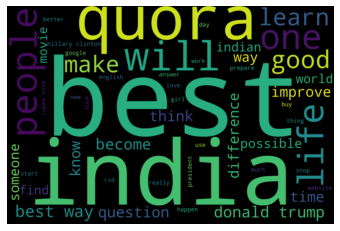

In [169]:
wc = WordCloud(width = 3000,height = 2000, background_color="black", max_words=50, stopwords=STOPWORDS)
wc.generate(text_p)
print ("Word Cloud for Duplicate Question pairs")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Word Cloud for Duplicate Question pairs


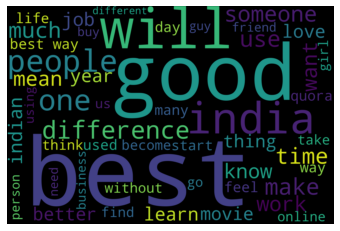

In [173]:
# Word Clouds generated from non duplicate pair question's text
wc = WordCloud(width = 3000,height = 2000, background_color="black", max_words=50, stopwords=STOPWORDS)
wc.generate(text_n)
print ("Word Cloud for Duplicate Question pairs")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

### Analysing fuzz ratio , fuzz_partial , token_set , ,token_sort ratio

In [174]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'freq_qid1', 'freq_qid2', 'q1len', 'q2len', 'q1_n_words', 'q2_n_words',
       'word_Common', 'word_Total', 'word_share', 'freq_q1+q2', 'freq_q1-q2',
       'fuzz_Ratio', 'fuzz_Partial_Ratio', 'Token_Sort_Ratio',
       'Token_Set_Ratio', 'Last_Word', 'First_Word', 'Length_diff', 'cwc_min',
       'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max', 'mean_length',
       'Longest_Substr_ratio'],
      dtype='object')

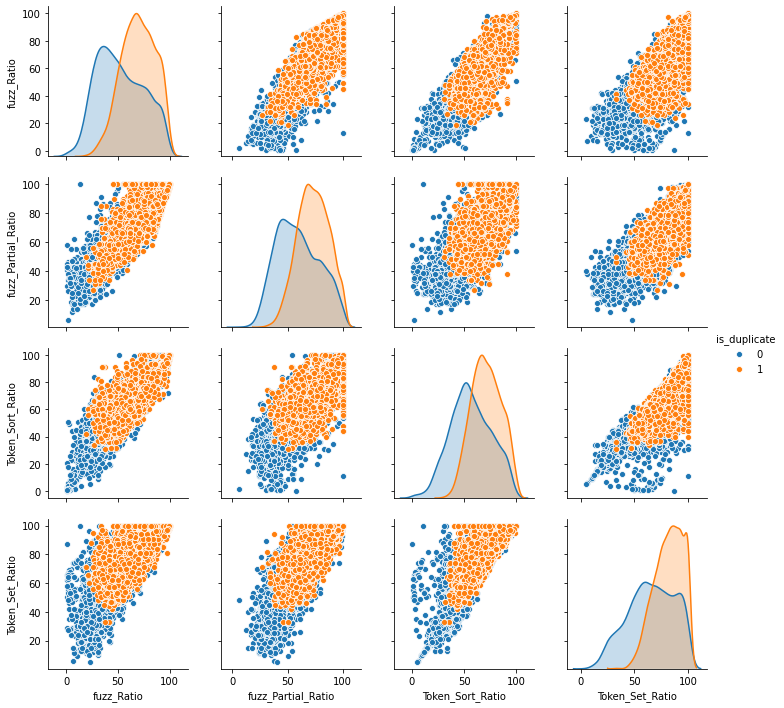

In [176]:
sns.pairplot(df[['fuzz_Ratio', 'fuzz_Partial_Ratio', 'Token_Sort_Ratio',
       'Token_Set_Ratio', 'is_duplicate']], hue='is_duplicate', vars=['fuzz_Ratio', 'fuzz_Partial_Ratio', 'Token_Sort_Ratio',
       'Token_Set_Ratio'])


In [ ]:
### fuzz ratio vs token_sort ratio ===> There is a slight overlapping or less seaparability over here b/w blue points & orange points 
### it means  ,this feature matters us lot as we have slight overlapping as we can set soe threshold 

In [ ]:
### whereas Token_set_ratio in a univariate sense 

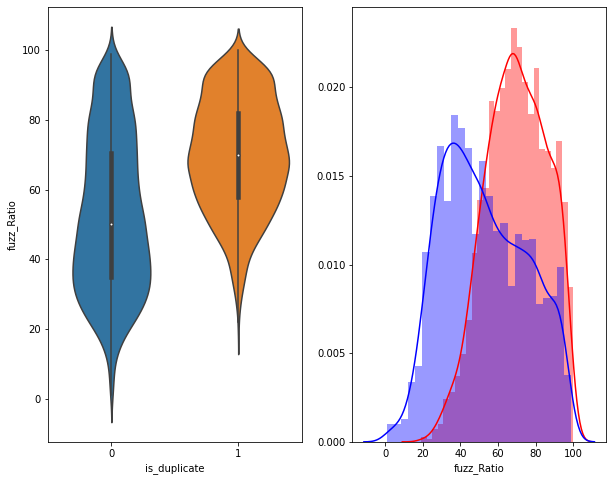

In [177]:
# Distribution of the Simple_Ratio
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'fuzz_Ratio', data = df )

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1]['fuzz_Ratio'] ,  color = 'red')
sns.distplot(df[df['is_duplicate'] == 0]['fuzz_Ratio'] ,  color = 'blue' )
plt.show()

In [ ]:
### we have some kind of overlappping reion
### when clas is 1 , it mean we have higher value of fuzz_ratio than class 0
## it means fuzz_ratio is a interesting ratio as have less overlapping region

## similarly from violinplot ,we will say on account of less overlappping , this feature fuzz ratio is amazing & useful in determining the class label


### Automate above stuffs

In [178]:
def get_dist(feature):
    # Distribution of the Simple_Ratio
    plt.figure(figsize=(10, 8))

    plt.subplot(1,2,1)
    sns.violinplot(x = 'is_duplicate', y = feature, data = df )

    plt.subplot(1,2,2)
    sns.distplot(df[df['is_duplicate'] == 1][feature] ,  color = 'red')
    sns.distplot(df[df['is_duplicate'] == 0][feature] ,  color = 'blue' )
    plt.show()

In [179]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'freq_qid1', 'freq_qid2', 'q1len', 'q2len', 'q1_n_words', 'q2_n_words',
       'word_Common', 'word_Total', 'word_share', 'freq_q1+q2', 'freq_q1-q2',
       'fuzz_Ratio', 'fuzz_Partial_Ratio', 'Token_Sort_Ratio',
       'Token_Set_Ratio', 'Last_Word', 'First_Word', 'Length_diff', 'cwc_min',
       'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max', 'mean_length',
       'Longest_Substr_ratio'],
      dtype='object')

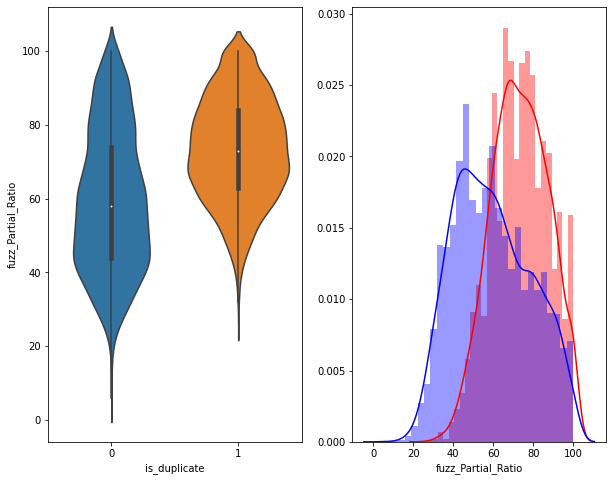

In [180]:
get_dist('fuzz_Partial_Ratio')

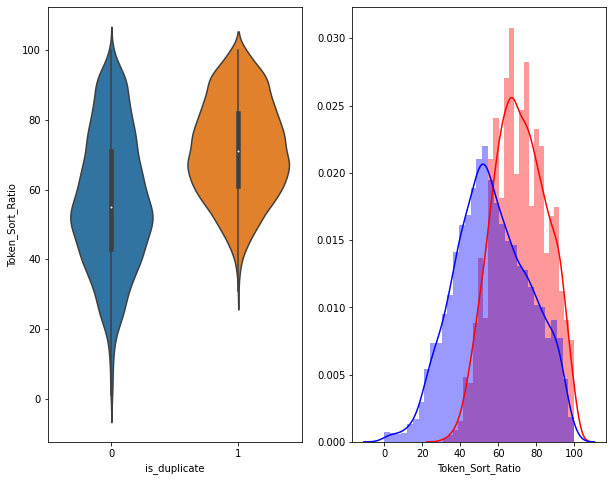

In [181]:
get_dist('Token_Sort_Ratio')

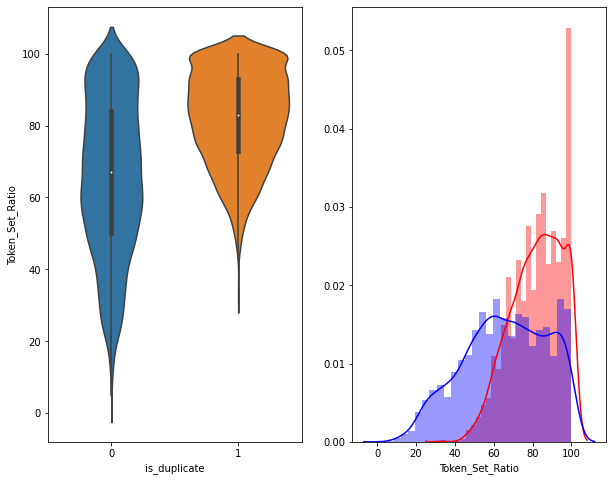

In [182]:
get_dist('Token_Set_Ratio')

<h4> 3.5.1.2 Pair plot of features ['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio'] </h4>

In [184]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'freq_qid1', 'freq_qid2', 'q1len', 'q2len', 'q1_n_words', 'q2_n_words',
       'word_Common', 'word_Total', 'word_share', 'freq_q1+q2', 'freq_q1-q2',
       'fuzz_Ratio', 'fuzz_Partial_Ratio', 'Token_Sort_Ratio',
       'Token_Set_Ratio', 'Last_Word', 'First_Word', 'Length_diff', 'cwc_min',
       'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max', 'mean_length',
       'Longest_Substr_ratio'],
      dtype='object')

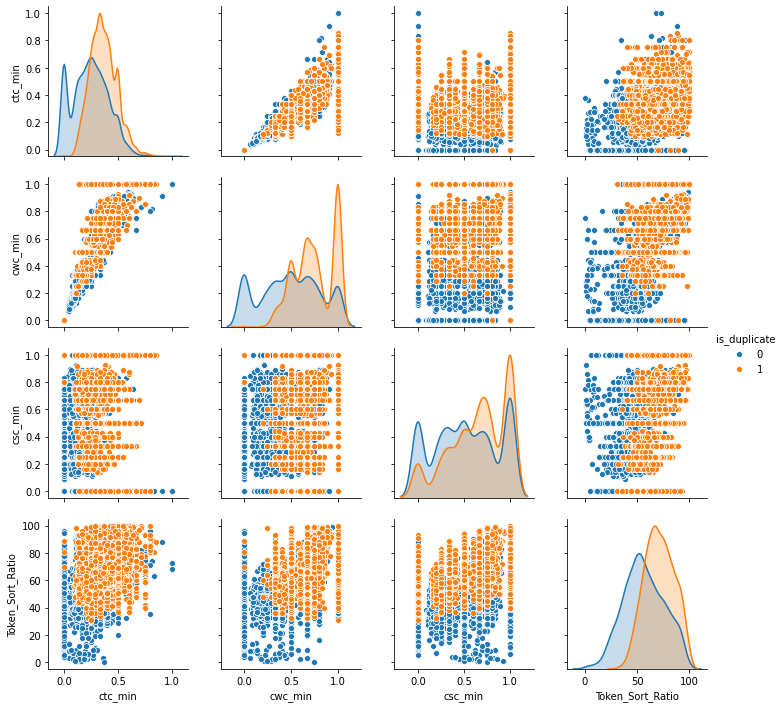

In [186]:

sns.pairplot(df[['ctc_min', 'cwc_min', 'csc_min', 'Token_Sort_Ratio', 'is_duplicate']], hue='is_duplicate', vars=['ctc_min', 'cwc_min', 'csc_min', 'Token_Sort_Ratio'])
plt.show()

<h3>3.5.2 Visualization </h3>

In [0]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import MinMaxScaler

dfp_subsampled = df[0:5000]
X = MinMaxScaler().fit_transform(dfp_subsampled[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = dfp_subsampled['is_duplicate'].values

In [0]:
##n_components=2 referes to 2D ,
## n_iter=1000 - no of iteratiosn for which TSNE runs..

tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.011s...
[t-SNE] Computed neighbors for 5000 samples in 0.912s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.116557
[t-SNE] Computed conditional probabilities in 0.433s
[t-SNE] Iteration 50: error = 80.9244080, gradient norm = 0.0428133 (50 iterations in 13.099s)
[t-SNE] Iteration 100: error = 70.3858795, gradient norm = 0.0100968 (50 iterations in 9.067s)
[t-SNE] Iteration 150: error = 68.6138382, gradient norm = 0.0058392 (50 iterations in 9.602s)
[t-SNE] Iteration 200: error = 67.7700119, gradient norm = 0.0036596 (50 iterations in 9.121s)
[t-SNE] Iteration 250: error = 67.2725067, gradient norm = 0.003496

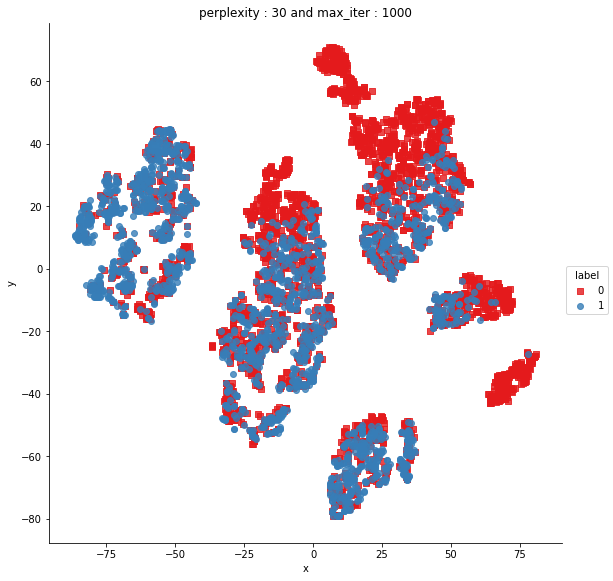

In [0]:
df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,palette="Set1",markers=['s','o'])
plt.title("perplexity : {} and max_iter : {}".format(30, 1000))
plt.show()

In [ ]:
### from TSNE visualisation , we will see there is a lot of class 0 data points that is clearly separable from class 1 data points
### Ya there are some regions where we have some kind of overlapping , but most of are those regions that can be easily separable

## infernce-- as there is a less overlapping then we will say the 15 features that we desined are certainly usefull for us

In [0]:
from sklearn.manifold import TSNE
tsne3d = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.010s...
[t-SNE] Computed neighbors for 5000 samples in 0.935s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.116557
[t-SNE] Computed conditional probabilities in 0.363s
[t-SNE] Iteration 50: error = 77.7944183, gradient norm = 0.1014017 (50 iterations in 34.931s)
[t-SNE] Iteration 100: error = 69.2682266, gradient norm = 0.0248657 (50 iterations in 15.147s)
[t-SNE] Iteration 150: error = 67.7877655, gradient norm = 0.0150941 (50 iterations in 13.761s)
[t-SNE] Iteration 200: error = 67.1991119, gradient norm = 0.0126559 (50 iterations in 13.425s)
[t-SNE] Iteration 250: error = 66.8560715, gradient norm = 0.007

In [0]:
trace1 = go.Scatter3d(
    x=tsne3d[:,0],
    y=tsne3d[:,1],
    z=tsne3d[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = y,
        colorscale = 'Portland',
        colorbar = dict(title = 'duplicate'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.75
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='3d embedding with engineered features')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')